In [344]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [345]:
# Adjust the size of plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [346]:
# Read in the dataset
df = pd.read_csv('movies.csv')

In [347]:
# Look at the dataframe
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [348]:
# Check for Missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [349]:
# Number of null values is each column - we see mostly in budget
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [350]:
df = df.dropna(axis=0)

In [351]:
# Check again for Missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [352]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [353]:
# Changing Data Types of Float Columns to remove decimals - apart from Score

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [354]:
# Creating a Year column that is correct 

df[['date','split']] = df['released'].str.split(',', n = 1, expand=True)
df = df.drop(columns='date')
df[['year_correct','delete']] = df['split'].str.split('(',n = 1, expand=True)
df = df.drop(columns=['delete','split','year'])
df = df.dropna(axis=0)
df['year_correct'] = df['year_correct'].astype(int)

In [355]:
df = df.reset_index()
df = df.drop(columns='index')

In [356]:
# Have a look at the Dataframe sorted by highest grossing movies

df.sort_values(by=['gross'], ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
3718,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5288,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1783,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4716,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5144,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
1367,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
2274,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
154,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [357]:
# Drop any duplicated rows of data

df = df.drop_duplicates()

In [358]:
# Potential Correlations to check out with gross:
# Budget
# Company 

Text(0, 0.5, 'Gross Revenue')

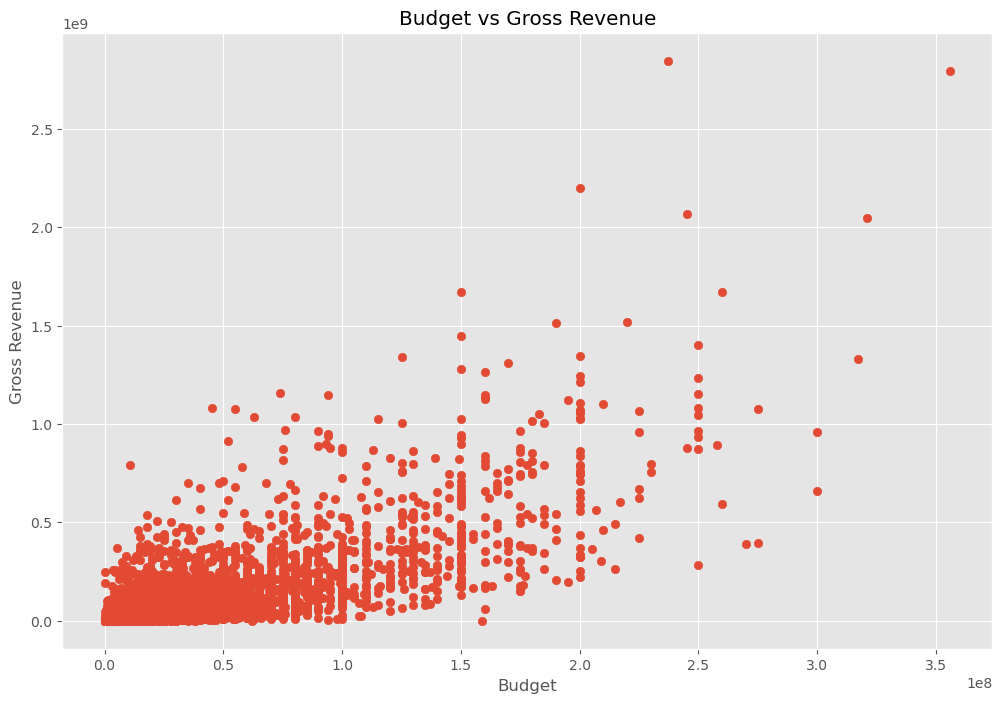

In [359]:
# Scatter plot to compare budget and gross revenue 

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

<Axes: xlabel='budget', ylabel='gross'>

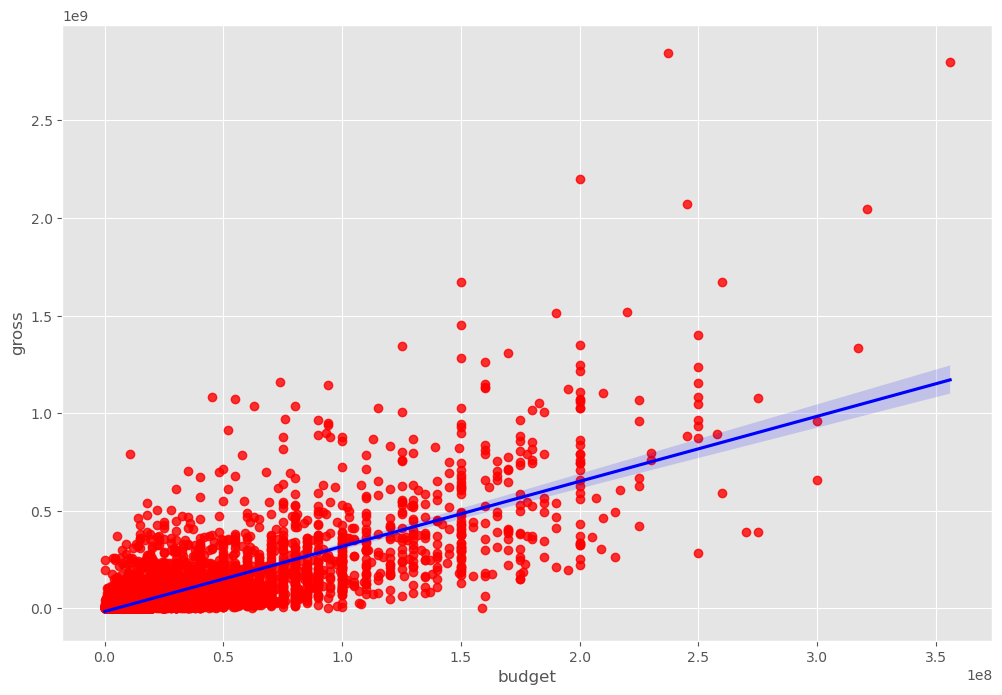

In [360]:
# Use Seaborn to plot Budget vs Gross Revenue

sns.regplot(x = 'budget', y='gross',data=df, scatter_kws = {'color': 'r'}, line_kws = {'color': 'b'})

In [361]:
# Brief overview of the Correlation on numerical fields 

# Pearson method

# We see a high correlation between budget and gross
df.corr(method = 'pearson', numeric_only=True)

,score,votes,budget,gross,runtime,year_correct
score,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
year_correct,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


In [362]:
# Kendall method


df.corr(method = 'kendall', numeric_only=True)

,score,votes,budget,gross,runtime,year_correct
score,1.000000,0.350695,-0.007075,0.124601,0.292696,0.043315
votes,0.350695,1.000000,0.344894,0.552331,0.205562,0.291619
budget,-0.007075,0.344894,1.000000,0.510889,0.230709,0.212905
gross,0.124601,0.552331,0.510889,1.000000,0.176728,0.231100
runtime,0.292696,0.205562,0.230709,0.176728,1.000000,0.064861
year_correct,0.043315,0.291619,0.212905,0.231100,0.064861,1.000000


In [363]:
# Spearman method

df.corr(method = 'spearman', numeric_only=True)

,score,votes,budget,gross,runtime,year_correct
score,1.000000,0.496104,-0.010972,0.182673,0.412782,0.063547
votes,0.496104,1.000000,0.491603,0.744457,0.300912,0.421171
budget,-0.010972,0.491603,1.000000,0.691660,0.330007,0.301319
gross,0.182673,0.744457,0.691660,1.000000,0.257024,0.338824
runtime,0.412782,0.300912,0.330007,0.257024,1.000000,0.095559
year_correct,0.063547,0.421171,0.301319,0.338824,0.095559,1.000000


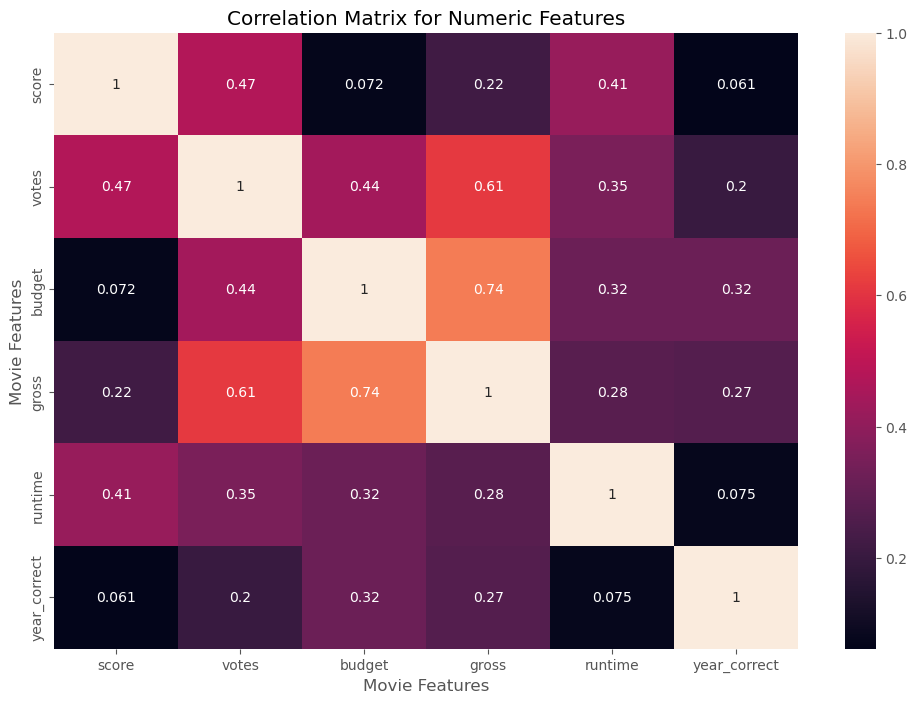

In [364]:
# Visualise Correlation Matrix in a Heatmap

correlation_matrix = df.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [365]:
# Numerise the string data
# Investigate Company Correlation

df_numerised = df.copy()

for col_name in df_numerised.columns:
    if (df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes

df_numerised


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4679,6,6,1297,8.4,927000,1791,2828,694,46,19000000,46998772,1420,146,1980
1,3917,6,1,1120,5.8,65000,1574,1155,213,47,4500000,58853106,448,104,1980
2,3630,4,0,1352,8.7,1200000,754,1815,1151,47,18000000,538375067,940,124,1980
3,204,4,4,1120,7.7,221000,885,1410,1467,47,3500000,83453539,1103,88,1980
4,732,6,4,1163,7.3,108000,716,349,270,47,6000000,39846344,1078,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,415,6,0,898,6.6,140000,16,2386,1805,47,90000000,426505244,448,124,2020
5403,3545,4,0,707,6.5,102000,848,2305,146,47,85000000,319715683,1103,99,2020
5404,1150,4,1,898,5.6,53000,1805,2823,1463,47,175000000,245487753,1391,101,2020
5405,3966,4,1,752,6.8,42000,293,2087,635,6,135000000,111105497,12,100,2020


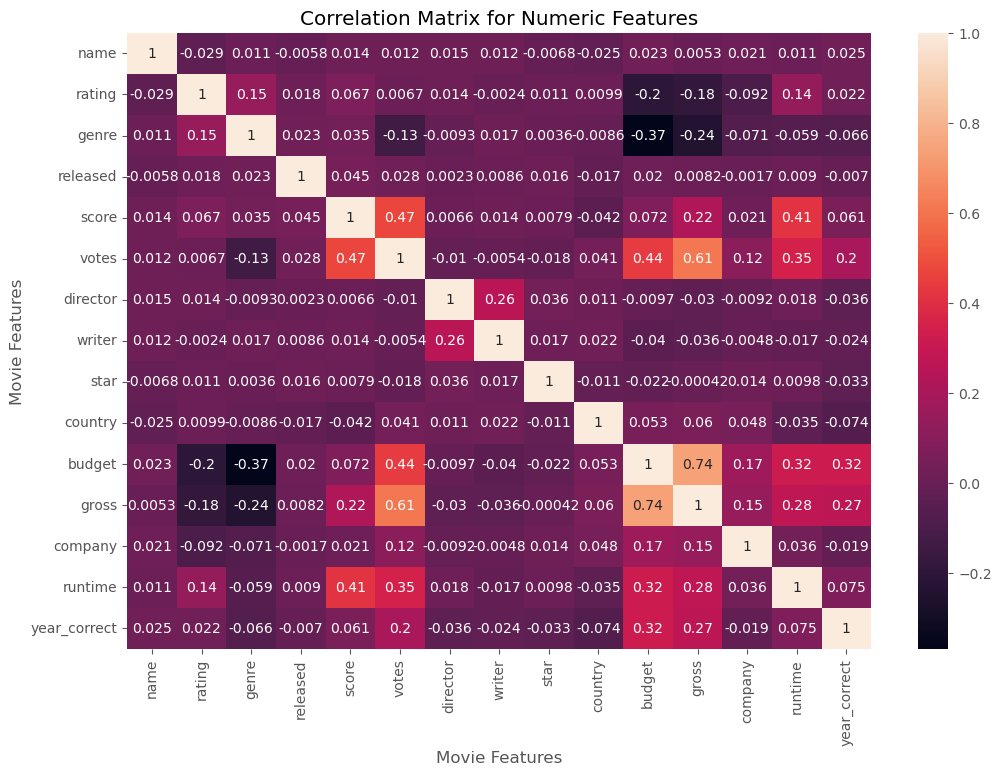

In [366]:
correlation_matrix = df_numerised.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [367]:
df_numerised.corr(method = 'pearson', numeric_only=True)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029220,0.010840,-0.005845,0.013644,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083,0.025485
rating,-0.029220,1.000000,0.148529,0.018322,0.066535,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450,0.022089
genre,0.010840,0.148529,1.000000,0.023328,0.035158,-0.134986,-0.009275,0.016506,0.003601,-0.008617,-0.368226,-0.243547,-0.071046,-0.059148,-0.066049
released,-0.005845,0.018322,0.023328,1.000000,0.045199,0.028408,0.002289,0.008617,0.015729,-0.016620,0.019633,0.008173,-0.001749,0.009033,-0.007025
score,0.013644,0.066535,0.035158,0.045199,1.000000,0.474594,0.006557,0.014493,0.007886,-0.042119,0.071552,0.222504,0.020800,0.414501,0.061443
votes,0.012264,0.006652,-0.134986,0.028408,0.474594,1.000000,-0.010430,-0.005376,-0.018099,0.041409,0.439077,0.614432,0.117717,0.352263,0.202215
director,0.014687,0.014283,-0.009275,0.002289,0.006557,-0.010430,1.000000,0.259625,0.035932,0.011458,-0.009708,-0.029676,-0.009179,0.018158,-0.036274
writer,0.012449,-0.002375,0.016506,0.008617,0.014493,-0.005376,0.259625,1.000000,0.017183,0.022269,-0.039757,-0.036044,-0.004835,-0.017491,-0.024065
star,-0.006846,0.010629,0.003601,0.015729,0.007886,-0.018099,0.035932,0.017183,1.000000,-0.011115,-0.022185,-0.000420,0.013621,0.009753,-0.032943
country,-0.025192,0.009889,-0.008617,-0.016620,-0.042119,0.041409,0.011458,0.022269,-0.011115,1.000000,0.052579,0.059910,0.047912,-0.035499,-0.074050


In [371]:
corr_mat = df_numerised.corr(method = 'pearson', numeric_only=True)
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.368226
genre         budget         -0.368226
              gross          -0.243547
gross         genre          -0.243547
budget        rating         -0.203553
                                ...   
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 225, dtype: float64

In [373]:
# Votes and Budget appear to have the highest correlation with Gross Revenue 
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.614432
gross         votes           0.614432
budget        gross           0.740028
gross         budget          0.740028
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [369]:
#pd.set_option('display.max.rows',None)
#pd.reset_option('display.max.rows',None)
#df.head()